# [ A new approach to constraining properties of AGN host galaxies by combining image and SED decomposition](https://ui.adsabs.harvard.edu/abs/2024arXiv241005857Y/abstract)
Yu, Haoran ; Fan, Lulu ; Han, Yunkun ; Sun, Weibin ; Zhang, Yihang ; Ding, Xuheng ; Xue, Yongquan

In [1]:
pwd

'/Users/hanyk/workplace/BayeSED3/observation/agn_host_decomp'

time: 5.38 ms (started: 2024-11-27 10:58:25 +08:00)


##  Show the structure of input file for BayeSED3
The first line must start with # followed by a space, then the name of this sample, the total number of photometric bands, the total number of other data, and the total number of spectroscopic bands

In [2]:
!head -n 2 sample.txt

#          sample     71         0  0
ID         z_min      z_max      d  E(B-V)  F435W_host  F435W_err_host  F606W_host  F606W_err_host  F775W_host  F775W_err_host  F814W_host  F814W_err_host  F850LP_host  F850LP_err_host  F105W_host  F105W_err_host  F110W_host  F110W_err_host  F125W_host  F125W_err_host  F140W_host  F140W_err_host  F160W_host  F160W_err_host  F435W_point  F435W_err_point  F606W_point  F606W_err_point  F775W_point  F775W_err_point  F814W_point  F814W_err_point  F850LP_point  F850LP_err_point  F105W_point  F105W_err_point  F110W_point  F110W_err_point  F125W_point  F125W_err_point  F140W_point  F140W_err_point  F160W_point  F160W_err_point  GALEX.FUV_total  GALEX.FUV_err_total  GALEX.NUV_total  GALEX.NUV_err_total  SLOAN.SDSS.u_total  SLOAN.SDSS.u_err_total  SLOAN.SDSS.g_total  SLOAN.SDSS.g_err_total  SLOAN.SDSS.r_total  SLOAN.SDSS.r_err_total  SLOAN.SDSS.i_total  SLOAN.SDSS.i_err_total  SLOAN.SDSS.z_total  SLOAN.SDSS.z_err_total  PS1.g_total  PS1.g_err_total  PS1.r_to

## Show the structure of filter definition  file
itype is the Filter transmission type: 0= Energy; 1= Photon; icalib is the FILTER_CALIB as defined in LEPHARE:

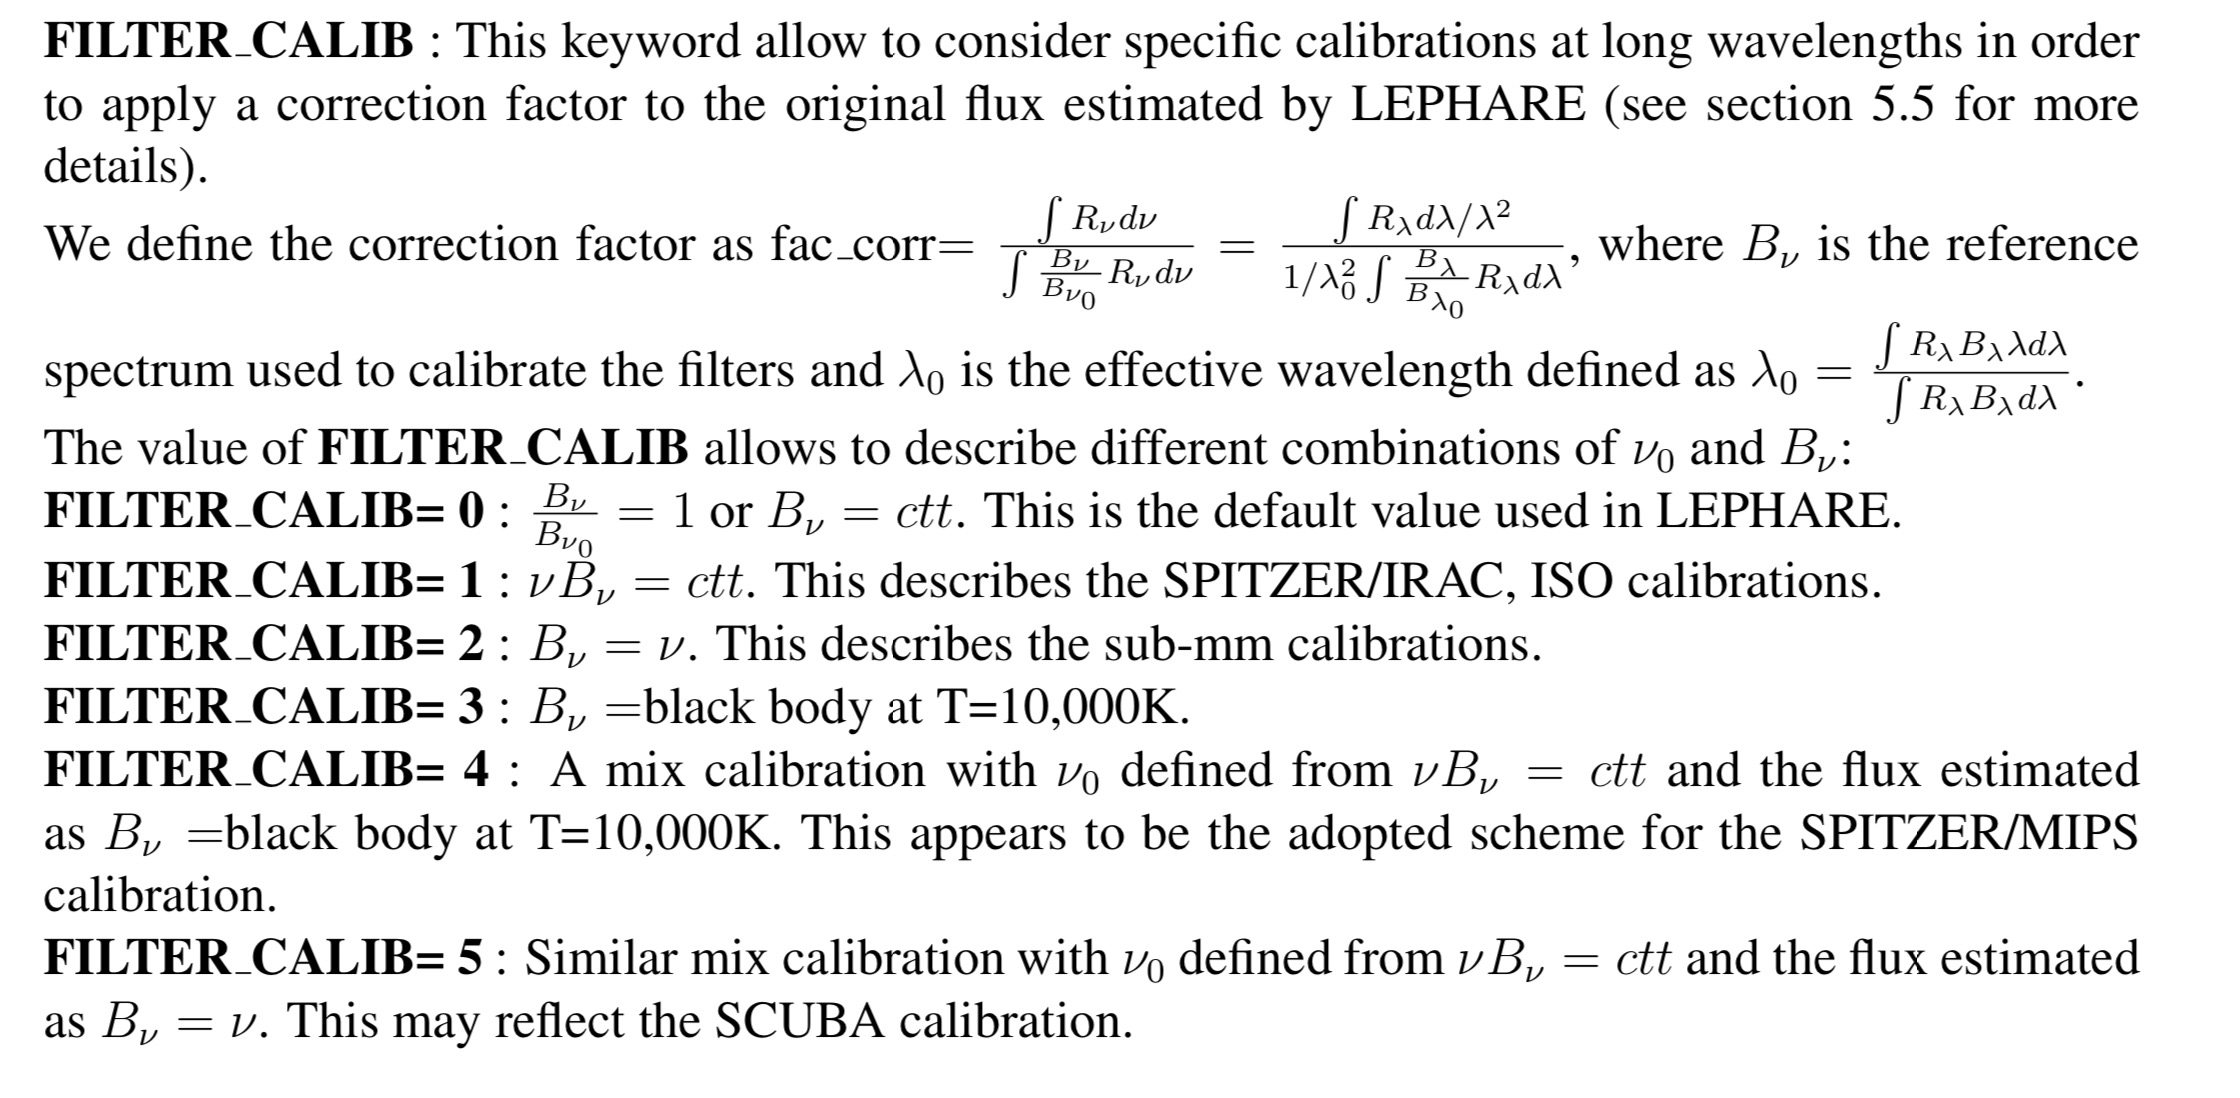

In [3]:
!head  filters.txt

# itype icalib description
# 1 0 HST/ACS_WFC.F435W
0.3526 7.5973e-05
0.3527 8.6502e-05
0.3528 9.70997e-05
0.3529 0.000107767
0.353 0.000118504
0.3531 0.000129307
0.3532 0.000140178
0.3533 0.000151118
time: 128 ms (started: 2024-11-27 10:58:25 +08:00)


## Show the structure of filter selection file
iused=1 means the data of this band is presented in the input file; iselected=1 means it will be selected for the analysis; id is sequence number of this band in the filter definition file; name is the name of the filter and can be modified; mid is the list of ids of SED models that will contribute to this band, -1 means all models; the rest columns of this file are other parameters of this band and only used for the mock data generation

In [4]:
!awk '{print $1,$2,$3,$4,$5}'  filters_selected.txt|column  -t

iused  iselected  id  name                    mid
1      1          0   F435W_host              0,1
1      1          1   F606W_host              0,1
1      1          2   F775W_host              0,1
1      1          3   F814W_host              0,1
1      1          4   F850LP_host             0,1
1      1          5   F105W_host              0,1
1      1          6   F110W_host              0,1
1      1          7   F125W_host              0,1
1      1          8   F140W_host              0,1
1      1          9   F160W_host              0,1
1      1          10  F435W_point             2,3
1      1          11  F606W_point             2,3
1      1          12  F775W_point             2,3
1      1          13  F814W_point             2,3
1      1          14  F850LP_point            2,3
1      1          15  F105W_point             2,3
1      1          16  F110W_point             2,3
1      1          17  F125W_point             2,3
1      1          18  F140W_point             2,3


## It is necessary  to start the run at the root directory of BayeSED3

In [5]:
cd ../../

/Users/hanyk/workplace/BayeSED3
time: 2.83 ms (started: 2024-11-27 10:58:25 +08:00)


## Run BayeSED3 with bash shell script

In [6]:
%%bash
#./observation/agn_host_decomp/run
bayesed="./bin/mac/bayesed_mn_1 -v 2"
mpirun="./openmpi/bin/mpirun --use-hwthread-cpus"
nlive=400
efr=0.3
tol=0.5
seed=1
verbose=1
multinest="--multinest 1,0,0,$nlive,$efr,$tol,1000,-1e90,$seed,$verbose,0,0,-1e90,100000,0.01" #see README_multinest.txt for the meaning of multinest parameters

#models="--ssp 0,0,bc2003_lr_BaSeL_chab,1,1,1,0,0,0,0,0 --sfh 0,8,0,1 --dal 0,2,8 -a 1,2,clumpy201410tor,1 -t 1,3,QSO1,-1 --dal 3,2,7"
#models="--ssp 0,0,bc2003_lr_BaSeL_chab,1,1,1,0,0,0,0,0 --sfh 0,8,0,1 --dal 0,2,8 -gb 0,1,gb,-2,1,1,1000,200 -a 1,2,clumpy201410tor,1 -t 1,3,QSO1,-1 --dal 3,2,7"

#galaxy model: simple stellar population (SSP), star formation history (SFH), and dust attenuation law (DAL) 
galaxy=""
galaxy+=" --ssp 0,0,bc2003_lr_BaSeL_chab,1,1,1,0,0,0,0,0"
galaxy+=" --sfh 0,8,0,1"
galaxy+=" --dal 0,2,8"

#dust emission model: greybody
dust="-gb 0,1,gb,-2,1,1,1000,200"

#AGN model
AGN_torus="-a 1,2,clumpy201410tor,1"
AGN_disk="-t 1,3,QSO1,-1 --dal 3,2,7"

models="$galaxy $dust $AGN_torus $AGN_disk"

# set the path to the observational data and configuration files
obs="./observation/agn_host_decomp"

#definition and selection of filters
filters="--filters $obs/filters.txt --filters_selected $obs/filters_selected.txt"

# set the path of input file
input="-i 0,$obs/sample.txt"

# set the path for output
output="--outdir $obs/output"

#save best-fitting results and posterior sample of parameters
save="--save_bestfit 0 --save_sample_par"

#set the prior for the observational systematic error
sys_err="--sys_err_obs 3,0,0.01,0.2,40"

#output luminosity at given wavelength for all SED models
luminosity="--luminosity -1,0.25,0.25"

Ntest="--Ntest 4"
time $mpirun $bayesed $multinest $input $filters $models $output $save $sys_err $luminosity  $Ntest

filters="--filters $obs/filters.txt --filters_selected $obs/filters_selected_total_only.txt"
time $mpirun $bayesed $multinest $input $filters $models $output $save $sys_err $luminosity  $Ntest --suffix _total_only


Loading nets/bc2003_lr_BaSeL_chab.aknn ... done!

Loading nets/bc2003_lr_BaSeL_chab_derived.aknn ... done!

Full list of inputted and derived parameters for model csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8[0,1]
---------------------------------------------
id: name min max
0: log(age/yr)[0,1] 8 10.14
1: alpha[0,1] 0.01 1000
2: beta[0,1] 0.01 1000
3: tau[0,1] 0.007 1
4: p[0,1] 0.1 2
5: log(Z/Zsun)[0,1] -2.30103 0.69897
6: f[0,1] 0 1
7: Av_2[0,1] 0 4
---------------------------------------------
id: name
0: log(scale)[0,1]
1: ageU(zform)/Gyr[0,1]
2: log(ageMW/yr)[0,1]
3: log(ZMW/Zsun)[0,1]
4: log(CEH(0)/Zsun)[0,1]
5: log(SFH(0)/[M_{sun}/yr])[0,1]
6: log(SFR_{10Myr}/[M_{sun}/yr])[0,1]
7: log(SFR_{100Myr}/[M_{sun}/yr])[0,1]
8: log(Mstar_formed)[0,1]
9: log(Mstar)[0,1]
10: log(Mstar_liv)[0,1]
11: log(vLv_{0.25um,unabsorbed}/[erg/s])[0,1]
12: log(vLv_{0.25um,absorbed}/[erg/s])[0,1]
13: log(L_{unabsorbed}/[erg/s])[0,1]
14: log(L_{absorbed}/[erg/s])[0,1]

Full list of inputted and derived pa

 Starting MultiNest

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.


dumper(1/1):iconverged=2,spend_time=53897.3


 ln(ev)=  -158.42421557732672      +/-  0.20688431843057711     
 Total Likelihood Evaluations:        95845
 Sampling finished. Exiting MultiNest



--------------------------------------------------------------------------------------
 Priors:             name  iprior_type      is_age         min         max        nbin
      0:                z            1           0     1.25745     1.25745         100
      1:         sys_err0            3           0        0.01         0.2          40
      2: log(age/yr)[0,1]            1           1           8       10.14          40
      3:       alpha[0,1]            1           0        0.01        1000          40
      4:        beta[0,1]            1           0        0.01        1000          40
      5:         tau[0,1]            1           0       0.007           1          40
      6:           p[0,1]            1           0         0.1           2          40
      7: log(Z/Zsun)[0,1]            1           0    -2.30103     0.69897          40
      8:           f[0,1]            1           0           0           1          40
      9:        Av_2[0,1]            1    

 Starting MultiNest

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.


dumper(1/1):iconverged=0,spend_time=52259.3


 ln(ev)=  -188.35950431071879      +/-  0.23179952298481180     
 Total Likelihood Evaluations:       100001
 Sampling finished. Exiting MultiNest



--------------------------------------------------------------------------------------
 Priors:             name  iprior_type      is_age         min         max        nbin
      0:                z            1           0     1.56588     1.56588         100
      1:         sys_err0            3           0        0.01         0.2          40
      2: log(age/yr)[0,1]            1           1           8       10.14          40
      3:       alpha[0,1]            1           0        0.01        1000          40
      4:        beta[0,1]            1           0        0.01        1000          40
      5:         tau[0,1]            1           0       0.007           1          40
      6:           p[0,1]            1           0         0.1           2          40
      7: log(Z/Zsun)[0,1]            1           0    -2.30103     0.69897          40
      8:           f[0,1]            1           0           0           1          40
      9:        Av_2[0,1]            1    

 Starting MultiNest

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.


dumper(1/1):iconverged=2,spend_time=39425.3


 ln(ev)=  -84.043169394342513      +/-  0.18772949540385422     
 Total Likelihood Evaluations:        68022
 Sampling finished. Exiting MultiNest



--------------------------------------------------------------------------------------
 Priors:             name  iprior_type      is_age         min         max        nbin
      0:                z            1           0    0.740331    0.740331         100
      1:         sys_err0            3           0        0.01         0.2          40
      2: log(age/yr)[0,1]            1           1           8       10.14          40
      3:       alpha[0,1]            1           0        0.01        1000          40
      4:        beta[0,1]            1           0        0.01        1000          40
      5:         tau[0,1]            1           0       0.007           1          40
      6:           p[0,1]            1           0         0.1           2          40
      7: log(Z/Zsun)[0,1]            1           0    -2.30103     0.69897          40
      8:           f[0,1]            1           0           0           1          40
      9:        Av_2[0,1]            1    

 Starting MultiNest

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.


dumper(1/1):iconverged=2,spend_time=34419.5


 ln(ev)=  -227.54027257026252      +/-  0.22502004843843540     
 Total Likelihood Evaluations:        53439
 Sampling finished. Exiting MultiNest




real	3m9.394s
user	60m36.860s
sys	0m15.232s


time: 3min 9s (started: 2024-11-27 10:58:25 +08:00)


## Run the code again  with total flux only by using a different filter selection file

In [7]:
%%bash
#./observation/agn_host_decomp/run
bayesed="./bin/mac/bayesed_mn_1 -v 2"
mpirun="./openmpi/bin/mpirun --use-hwthread-cpus"
nlive=400
efr=0.3
tol=0.5
seed=1
verbose=1
multinest="--multinest 1,0,0,$nlive,$efr,$tol,1000,-1e90,$seed,$verbose,0,0,-1e90,100000,0.01" #see README_multinest.txt for the meaning of multinest parameters

#models="--ssp 0,0,bc2003_lr_BaSeL_chab,1,1,1,0,0,0,0,0 --sfh 0,8,0,1 --dal 0,2,8 -a 1,2,clumpy201410tor,1 -t 1,3,QSO1,-1 --dal 3,2,7"
#models="--ssp 0,0,bc2003_lr_BaSeL_chab,1,1,1,0,0,0,0,0 --sfh 0,8,0,1 --dal 0,2,8 -gb 0,1,gb,-2,1,1,1000,200 -a 1,2,clumpy201410tor,1 -t 1,3,QSO1,-1 --dal 3,2,7"

#galaxy model: simple stellar population (SSP), star formation history (SFH), and dust attenuation law (DAL) 
galaxy=""
galaxy+=" --ssp 0,0,bc2003_lr_BaSeL_chab,1,1,1,0,0,0,0,0"
galaxy+=" --sfh 0,8,0,1"
galaxy+=" --dal 0,2,8"

#dust emission model: greybody
dust="-gb 0,1,gb,-2,1,1,1000,200"

#AGN model
AGN_torus="-a 1,2,clumpy201410tor,1"
AGN_disk="-t 1,3,QSO1,-1 --dal 3,2,7"

models="$galaxy $dust $AGN_torus $AGN_disk"

# set the path to the observational data and configuration files
obs="./observation/agn_host_decomp"

#definition and selection of filters
filters="--filters $obs/filters.txt --filters_selected $obs/filters_selected_total_only.txt"

# set the path of input file
input="-i 0,$obs/sample.txt"

# set the path for output
output="--outdir $obs/output"

#save best-fitting results and posterior sample of parameters
save="--save_bestfit 0 --save_sample_par"

#set the prior for the observational systematic error
sys_err="--sys_err_obs 3,0,0.01,0.2,40"

#output luminosity at given wavelength for all SED models
luminosity="--luminosity -1,0.25,0.25"

Ntest="--Ntest 4"
time $mpirun $bayesed $multinest $input $filters $models $output $save $sys_err $luminosity  $Ntest --suffix _total_only


Loading nets/bc2003_lr_BaSeL_chab.aknn ... done!

Loading nets/bc2003_lr_BaSeL_chab_derived.aknn ... done!

Full list of inputted and derived parameters for model csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8[0,1]
---------------------------------------------
id: name min max
0: log(age/yr)[0,1] 8 10.14
1: alpha[0,1] 0.01 1000
2: beta[0,1] 0.01 1000
3: tau[0,1] 0.007 1
4: p[0,1] 0.1 2
5: log(Z/Zsun)[0,1] -2.30103 0.69897
6: f[0,1] 0 1
7: Av_2[0,1] 0 4
---------------------------------------------
id: name
0: log(scale)[0,1]
1: ageU(zform)/Gyr[0,1]
2: log(ageMW/yr)[0,1]
3: log(ZMW/Zsun)[0,1]
4: log(CEH(0)/Zsun)[0,1]
5: log(SFH(0)/[M_{sun}/yr])[0,1]
6: log(SFR_{10Myr}/[M_{sun}/yr])[0,1]
7: log(SFR_{100Myr}/[M_{sun}/yr])[0,1]
8: log(Mstar_formed)[0,1]
9: log(Mstar)[0,1]
10: log(Mstar_liv)[0,1]
11: log(vLv_{0.25um,unabsorbed}/[erg/s])[0,1]
12: log(vLv_{0.25um,absorbed}/[erg/s])[0,1]
13: log(L_{unabsorbed}/[erg/s])[0,1]
14: log(L_{absorbed}/[erg/s])[0,1]

Full list of inputted and derived pa

 Starting MultiNest


dumper(1/1):iconverged=0,spend_time=54106.9


 ln(ev)=  -132.36465617257113      +/-  0.19091598801007037     
 Total Likelihood Evaluations:       100001
 Sampling finished. Exiting MultiNest



--------------------------------------------------------------------------------------
 Priors:             name  iprior_type      is_age         min         max        nbin
      0:                z            1           0     1.25745     1.25745         100
      1:         sys_err0            3           0        0.01         0.2          40
      2: log(age/yr)[0,1]            1           1           8       10.14          40
      3:       alpha[0,1]            1           0        0.01        1000          40
      4:        beta[0,1]            1           0        0.01        1000          40
      5:         tau[0,1]            1           0       0.007           1          40
      6:           p[0,1]            1           0         0.1           2          40
      7: log(Z/Zsun)[0,1]            1           0    -2.30103     0.69897          40
      8:           f[0,1]            1           0           0           1          40
      9:        Av_2[0,1]            1    

 Starting MultiNest


dumper(1/1):iconverged=2,spend_time=45294.4


 ln(ev)=  -163.10885009179364      +/-  0.21370025011727939     
 Total Likelihood Evaluations:        79415
 Sampling finished. Exiting MultiNest



--------------------------------------------------------------------------------------
 Priors:             name  iprior_type      is_age         min         max        nbin
      0:                z            1           0     1.56588     1.56588         100
      1:         sys_err0            3           0        0.01         0.2          40
      2: log(age/yr)[0,1]            1           1           8       10.14          40
      3:       alpha[0,1]            1           0        0.01        1000          40
      4:        beta[0,1]            1           0        0.01        1000          40
      5:         tau[0,1]            1           0       0.007           1          40
      6:           p[0,1]            1           0         0.1           2          40
      7: log(Z/Zsun)[0,1]            1           0    -2.30103     0.69897          40
      8:           f[0,1]            1           0           0           1          40
      9:        Av_2[0,1]            1    

 Starting MultiNest


dumper(1/1):iconverged=2,spend_time=40189.1


 ln(ev)=  -76.941837872522072      +/-  0.16464267399940191     
 Total Likelihood Evaluations:        63482
 Sampling finished. Exiting MultiNest



--------------------------------------------------------------------------------------
 Priors:             name  iprior_type      is_age         min         max        nbin
      0:                z            1           0    0.740331    0.740331         100
      1:         sys_err0            3           0        0.01         0.2          40
      2: log(age/yr)[0,1]            1           1           8       10.14          40
      3:       alpha[0,1]            1           0        0.01        1000          40
      4:        beta[0,1]            1           0        0.01        1000          40
      5:         tau[0,1]            1           0       0.007           1          40
      6:           p[0,1]            1           0         0.1           2          40
      7: log(Z/Zsun)[0,1]            1           0    -2.30103     0.69897          40
      8:           f[0,1]            1           0           0           1          40
      9:        Av_2[0,1]            1    

 Starting MultiNest

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.

 MultiNest Warning!
 Parameter           22  of mode            1  is converging towards the edge of the prior.


dumper(1/1):iconverged=2,spend_time=28081.9


 ln(ev)=  -164.98505388687977      +/-  0.19403875454325917     
 Total Likelihood Evaluations:        32588
 Sampling finished. Exiting MultiNest




real	2m58.662s
user	56m25.750s
sys	0m16.719s


time: 2min 58s (started: 2024-11-27 11:01:34 +08:00)


## Show the structure of BayeSED3 output

In [8]:
!tree observation/agn_host_decomp/output

observation/agn_host_decomp/output
├── sample
│   ├── cid_108
│   │   ├── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_bestfit.fits
│   │   ├── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_sample_par.paramnames
│   │   ├── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_sample_par.txt
│   │   ├── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_total_only_bestfit.fits
│   │   ├── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_total_only_sample_par.paramnames
│   │   └── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_total_only_sample_par.txt
│   ├── cid_216
│   │   ├── 0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_bestfit.fits
│   │   ├── 0csp_sfh

##  Best-fitting Plot with *.bestfit.fits files

<ipython-input-9-e506e36c07d6>:468: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


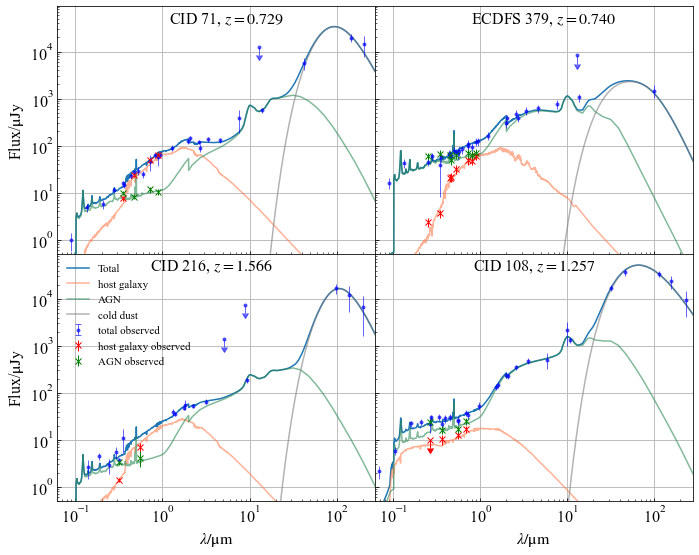

time: 2.35 s (started: 2024-11-27 11:04:33 +08:00)


In [9]:
#observation/agn_host_decomp/plot_SED.py
%matplotlib inline
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

rcParams['savefig.dpi'] = 150
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 16
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'

from astropy.table import Table
import sys
import re

output="observation/agn_host_decomp/output"
collection = 'sample'
xid = 'cid_71'
hdul = fits.open(rf'{output}/{collection}/{xid}/0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_bestfit.fits')

fig, ax = plt.subplots(figsize=(10, 8), nrows=2, ncols=2, sharex=True, sharey=True,
                      gridspec_kw={'hspace': 0, 'wspace': 0})
c1 = 2.9979246e+14 #um/s
if hdul.__contains__('model:total'):
    total=hdul['model:total'].data
    mask=total['flux']>0
    ax[0][0].plot(total[mask]['wavelength_rest'],total[mask]['flux'],label='Total')
    xmin=min(total['wavelength_rest'])
    xmax=max(total['wavelength_rest'])
    ymin=min(total[mask]['flux'])
    ymax=max(total[mask]['flux'])

models=[hdul[i].name for i in range(0,len(hdul)) if 'model:' in hdul[i].name and hdul[i].name!='model:total']

# CSP model
model = models[0]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[0][0].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='host galaxy', color='coral', alpha=0.6)

# clumpy model
model = models[2]
clumpy=hdul[model].data

# QSO model
model = models[3]
qso=hdul[model].data

# clumpy + QSO
ax[0][0].loglog(obs_phot[mask]['wavelength_rest'],clumpy[mask]['flux'] + qso[mask]['flux'],label='AGN', color='seagreen', alpha=0.6)

# gb model
model = models[1]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[0][0].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='cold dust', color='grey', alpha=0.6)


if hdul.__contains__('obs:phot'):
    obs_phot=hdul['obs:phot'].data
    obs_phot=obs_phot[obs_phot['iselected']==1]

    host=[ 'host' in x for x in obs_phot['band']]
    point=[ 'point' in x for x in obs_phot['band']]
    total=[ 'total' in x for x in obs_phot['band']]

    host_mask = obs_phot[host]['flux_obs'] > 0
    point_mask = obs_phot[point]['flux_obs'] > 0
    total_mask = obs_phot[total]['flux_obs'] > 0



    host_uplims = obs_phot[host]['flux_obs_err0'][host_mask] < 0
    point_uplims = obs_phot[point]['flux_obs_err0'][point_mask] < 0
    total_uplims = obs_phot[total]['flux_obs_err0'][total_mask] < 0

    obs_phot=obs_phot[obs_phot['iselected']==1]

    total_err = obs_phot[total]['flux_obs_err'][total_mask]
    # The errors for uplims are minimized for clarity in visualization
    # total_err[total_uplims] = 4000
    total_flux=obs_phot[total]['flux_obs'][total_mask]
    total_flux[total_uplims]*=3

    ax[0][0].errorbar(obs_phot[total]['wavelength_rest_center'][total_mask],
             # obs_phot[total]['flux_obs'][total_mask],
             total_flux,
             total_err,
             uplims=total_uplims, elinewidth=1,
             alpha=0.6,
             fmt='.',color='blue',label='total observed')

    ax[0][0].errorbar(obs_phot[host]['wavelength_rest_center'][host_mask],
                 obs_phot[host]['flux_obs'][host_mask],
                 obs_phot[host]['flux_obs_err'][host_mask],
                 uplims=host_uplims, elinewidth=1,
                 fmt='x',color='red',label='host galaxy observed')

    ax[0][0].errorbar(obs_phot[point]['wavelength_rest_center'][point_mask],
                 obs_phot[point]['flux_obs'][point_mask],
                 obs_phot[point]['flux_obs_err'][point_mask],
                 uplims=point_uplims, elinewidth=1,
                 fmt='x',color='green',label='AGN observed')

    if len(models)>1:
        xmin=min(obs_phot['wavelength_rest_center']) * 0.9
        xmax=max(obs_phot['wavelength_rest_center']) * 1.2
        ymin=min(obs_phot['flux_obs'][obs_phot['flux_obs']>0])
        ymax=max(obs_phot['flux_obs'][obs_phot['flux_obs']>0]) * 2.5
ax[0][0].grid()
ax[0][0].set_xlim(xmin,xmax)
ax[0][0].set_ylim(1,ymax)
# ax[0][0].set_xlabel(r'$\lambda/\rm \mu m$')
ax[0][0].set_ylabel(r'Flux/$\rm \mu Jy$')
# ax[0][0].set_title(f"CID 71, $z={float(hdul[0].header['z_{MAL}']):.3f}$")
ax[0][0].text(10**((np.log10(xmin)+np.log10(xmax))/2), 10**4.6,
              f"CID 71, $z={float(hdul[0].header['z_{MAL}']):.3f}$",
             ha='center')


# ECDFS 379 -----------------------------------------------------------------------------------

collection = 'sample'
xid = 'ecdfs_379'
hdul = fits.open(rf'{output}/{collection}/{xid}/0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_bestfit.fits')

c1 = 2.9979246e+14 #um/s
if hdul.__contains__('model:total'):
    total=hdul['model:total'].data
    mask=total['flux']>0
    ax[0][1].plot(total[mask]['wavelength_rest'],total[mask]['flux'],label='Total')
    xmin=min(total['wavelength_rest'])
    xmax=max(total['wavelength_rest'])
    ymin=min(total[mask]['flux'])
    ymax=max(total[mask]['flux'])

models=[hdul[i].name for i in range(0,len(hdul)) if 'model:' in hdul[i].name and hdul[i].name!='model:total']

# CSP model
model = models[0]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[0][1].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='host galaxy', color='coral', alpha=0.6)

# clumpy model
model = models[2]
clumpy=hdul[model].data

# QSO model
model = models[3]
qso=hdul[model].data

# clumpy + QSO
ax[0][1].loglog(obs_phot[mask]['wavelength_rest'],clumpy[mask]['flux'] + qso[mask]['flux'],label='AGN', color='seagreen', alpha=0.6)

# gb model
model = models[1]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[0][1].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='cold dust', color='grey', alpha=0.6)


if hdul.__contains__('obs:phot'):
    obs_phot=hdul['obs:phot'].data
    obs_phot=obs_phot[obs_phot['iselected']==1]

    host=[ 'host' in x for x in obs_phot['band']]
    point=[ 'point' in x for x in obs_phot['band']]
    total=[ 'total' in x for x in obs_phot['band']]

    host_mask = obs_phot[host]['flux_obs'] > 0
    point_mask = obs_phot[point]['flux_obs'] > 0
    total_mask = obs_phot[total]['flux_obs'] > 0



    host_uplims = obs_phot[host]['flux_obs_err0'][host_mask] < 0
    point_uplims = obs_phot[point]['flux_obs_err0'][point_mask] < 0
    total_uplims = obs_phot[total]['flux_obs_err0'][total_mask] < 0

    obs_phot=obs_phot[obs_phot['iselected']==1]

    total_err = obs_phot[total]['flux_obs_err'][total_mask]
    # total_err[total_uplims] = 2500
    total_flux=obs_phot[total]['flux_obs'][total_mask]
    total_flux[total_uplims]*=3

    ax[0][1].errorbar(obs_phot[total]['wavelength_rest_center'][total_mask],
             # obs_phot[total]['flux_obs'][total_mask],
             total_flux,
             total_err,
             # obs_phot[total]['flux_obs_err'][total_mask],
             uplims=total_uplims, elinewidth=1,
             alpha=0.6,
             fmt='.',color='blue',label='total observed')

    ax[0][1].errorbar(obs_phot[host]['wavelength_rest_center'][host_mask],
                 obs_phot[host]['flux_obs'][host_mask],
                 obs_phot[host]['flux_obs_err'][host_mask],
                 uplims=host_uplims, elinewidth=1,
                 fmt='x',color='red',label='host galaxy observed')

    ax[0][1].errorbar(obs_phot[point]['wavelength_rest_center'][point_mask],
                 obs_phot[point]['flux_obs'][point_mask],
                 obs_phot[point]['flux_obs_err'][point_mask],
                 uplims=point_uplims, elinewidth=1,
                 fmt='x',color='green',label='AGN observed')

    # for xi, yi, yerri, uplim in zip(obs_phot[total]['wavelength_rest_center'][total_mask],
    #          obs_phot[total]['flux_obs'][total_mask],
    #          obs_phot[total]['flux_obs_err'][total_mask],
    #                                total_uplims):
    #     if uplim:
    #         ax[1].annotate('', xy=(xi, 100), xytext=(xi, yi),
    #                     arrowprops=dict(arrowstyle='->', color='blue', alpha=0.6))

    # ax.errorbar(obs_phot['wavelength_rest_center'],obs_phot['flux_model'],obs_phot['flux_model_err'],fmt='+',color='blue',label='phot:mod')
    if len(models)>1:
        xmin=min(obs_phot['wavelength_rest_center']) * 0.9
        xmax=max(obs_phot['wavelength_rest_center']) * 1.2
        ymin=min(obs_phot['flux_obs'][obs_phot['flux_obs']>0])
        ymax=max(obs_phot['flux_obs'][obs_phot['flux_obs']>0]) * 2.5

ax[0][1].set_xlim(xmin,xmax)
ax[0][1].set_ylim(1,ymax)
# ax[0][1].set_xlabel(r'$\lambda/\rm \mu m$')
# ax[0][1].set_ylabel(r'Flux/$\rm \mu Jy$')
# ax[0][1].set_title(f"ECDFS 379, $z={float(hdul[0].header['z_{MAL}']):.3f}$")
ax[0][1].text(10**((np.log10(xmin)+np.log10(xmax))/2), 10**4.6,
              f"ECDFS 379, $z={float(hdul[0].header['z_{MAL}']):.3f}$",
             ha='center')

# CID 216 -----------------------------------------------------------------------------------

collection = 'sample'
xid = 'cid_216'
hdul = fits.open(rf'{output}/{collection}/{xid}/0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_bestfit.fits')

c1 = 2.9979246e+14 #um/s
if hdul.__contains__('model:total'):
    total=hdul['model:total'].data
    mask=total['flux']>0
    ax[1][0].plot(total[mask]['wavelength_rest'],total[mask]['flux'],label='Total')
    xmin=min(total['wavelength_rest'])
    xmax=max(total['wavelength_rest'])
    ymin=min(total[mask]['flux'])
    ymax=max(total[mask]['flux'])

models=[hdul[i].name for i in range(0,len(hdul)) if 'model:' in hdul[i].name and hdul[i].name!='model:total']

# CSP model
model = models[0]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[1][0].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='host galaxy', color='coral', alpha=0.6)

# clumpy model
model = models[2]
clumpy=hdul[model].data

# QSO model
model = models[3]
qso=hdul[model].data

# clumpy + QSO
ax[1][0].loglog(obs_phot[mask]['wavelength_rest'],clumpy[mask]['flux'] + qso[mask]['flux'],label='AGN', color='seagreen', alpha=0.6)

# gb model
model = models[1]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[1][0].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='cold dust', color='grey', alpha=0.6)


if hdul.__contains__('obs:phot'):
    obs_phot=hdul['obs:phot'].data
    obs_phot=obs_phot[obs_phot['iselected']==1]

    host=[ 'host' in x for x in obs_phot['band']]
    point=[ 'point' in x for x in obs_phot['band']]
    total=[ 'total' in x for x in obs_phot['band']]

    host_mask = obs_phot[host]['flux_obs'] > 0
    point_mask = obs_phot[point]['flux_obs'] > 0
    total_mask = obs_phot[total]['flux_obs'] > 0



    host_uplims = obs_phot[host]['flux_obs_err0'][host_mask] < 0
    point_uplims = obs_phot[point]['flux_obs_err0'][point_mask] < 0
    total_uplims = obs_phot[total]['flux_obs_err0'][total_mask] < 0

    obs_phot=obs_phot[obs_phot['iselected']==1]

    total_err = obs_phot[total]['flux_obs_err'][total_mask]
    # total_err[total_uplims] = 250, 2500
    total_flux=obs_phot[total]['flux_obs'][total_mask]
    total_flux[total_uplims]*=3

    ax[1][0].errorbar(obs_phot[total]['wavelength_rest_center'][total_mask],
             # obs_phot[total]['flux_obs'][total_mask],
             total_flux,
             total_err,
             # obs_phot[total]['flux_obs_err'][total_mask],
             uplims=total_uplims, elinewidth=1,
             alpha=0.6,
             fmt='.',color='blue',label='total observed')

    ax[1][0].errorbar(obs_phot[host]['wavelength_rest_center'][host_mask],
                 obs_phot[host]['flux_obs'][host_mask],
                 obs_phot[host]['flux_obs_err'][host_mask],
                 uplims=host_uplims, elinewidth=1,
                 fmt='x',color='red',label='host galaxy observed')

    ax[1][0].errorbar(obs_phot[point]['wavelength_rest_center'][point_mask],
                 obs_phot[point]['flux_obs'][point_mask],
                 obs_phot[point]['flux_obs_err'][point_mask],
                 uplims=point_uplims, elinewidth=1,
                 fmt='x',color='green',label='AGN observed')

    # for xi, yi, yerri, uplim in zip(obs_phot[total]['wavelength_rest_center'][total_mask],
    #          obs_phot[total]['flux_obs'][total_mask],
    #          obs_phot[total]['flux_obs_err'][total_mask],
    #                                total_uplims):
    #     if uplim:
    #         ax[1].annotate('', xy=(xi, 100), xytext=(xi, yi),
    #                     arrowprops=dict(arrowstyle='->', color='blue', alpha=0.6))

    # ax.errorbar(obs_phot['wavelength_rest_center'],obs_phot['flux_model'],obs_phot['flux_model_err'],fmt='+',color='blue',label='phot:mod')
    if len(models)>1:
        xmin=min(obs_phot['wavelength_rest_center']) * 0.9
        xmax=max(obs_phot['wavelength_rest_center']) * 1.2
        ymin=min(obs_phot['flux_obs'][obs_phot['flux_obs']>0])
        ymax=max(obs_phot['flux_obs'][obs_phot['flux_obs']>0]) * 2.5

ax[1][0].set_xlim(xmin,xmax)
ax[1][0].set_ylim(.1,ymax)
ax[1][0].set_xlabel(r'$\lambda/\rm \mu m$')
ax[1][0].set_ylabel(r'Flux/$\rm \mu Jy$')
# ax[1][0].set_title(f"CID 216, $z={float(hdul[0].header['z_{MAL}']):.3f}$",)
ax[1][0].text(10**((np.log10(xmin)+np.log10(xmax))/2), 10**4.6,
              f"CID 216, $z={float(hdul[0].header['z_{MAL}']):.3f}$",
             ha='center')
ax[1][0].legend(fontsize=11, frameon=False, loc='upper left')

# CID 108 -----------------------------------------------------------------------------------

collection = 'sample'
xid = 'cid_108'
hdul = fits.open(rf'{output}/{collection}/{xid}/0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_bestfit.fits')

c1 = 2.9979246e+14 #um/s
if hdul.__contains__('model:total'):
    total=hdul['model:total'].data
    mask=total['flux']>0
    ax[1][1].plot(total[mask]['wavelength_rest'],total[mask]['flux'],label='Total')
    xmin=min(total['wavelength_rest'])
    xmax=max(total['wavelength_rest'])
    ymin=min(total[mask]['flux'])
    ymax=max(total[mask]['flux'])

models=[hdul[i].name for i in range(0,len(hdul)) if 'model:' in hdul[i].name and hdul[i].name!='model:total']

# CSP model
model = models[0]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[1][1].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='host galaxy', color='coral', alpha=0.6)

# clumpy model
model = models[2]
clumpy=hdul[model].data

# QSO model
model = models[3]
qso=hdul[model].data

# clumpy + QSO
ax[1][1].loglog(obs_phot[mask]['wavelength_rest'],clumpy[mask]['flux'] + qso[mask]['flux'],label='AGN', color='seagreen', alpha=0.6)

# gb model
model = models[1]
obs_phot=hdul[model].data
# mask=obs_phot['flux']>0
ax[1][1].loglog(obs_phot[mask]['wavelength_rest'],obs_phot[mask]['flux'],label='cold dust', color='grey', alpha=0.6)


if hdul.__contains__('obs:phot'):
    obs_phot=hdul['obs:phot'].data
    obs_phot=obs_phot[obs_phot['iselected']==1]

    host=[ 'host' in x for x in obs_phot['band']]
    point=[ 'point' in x for x in obs_phot['band']]
    total=[ 'total' in x for x in obs_phot['band']]

    host_mask = obs_phot[host]['flux_obs'] > 0
    point_mask = obs_phot[point]['flux_obs'] > 0
    total_mask = obs_phot[total]['flux_obs'] > 0



    host_uplims = obs_phot[host]['flux_obs_err0'][host_mask] < 0
    point_uplims = obs_phot[point]['flux_obs_err0'][point_mask] < 0
    total_uplims = obs_phot[total]['flux_obs_err0'][total_mask] < 0

    obs_phot=obs_phot[obs_phot['iselected']==1]

    total_err = obs_phot[total]['flux_obs_err'][total_mask]
    # total_err[total_uplims] = 250, 2500
    total_flux=obs_phot[total]['flux_obs'][total_mask]
    total_flux[total_uplims]*=3
    host_err = obs_phot[host]['flux_obs_err'][host_mask]
    # host_err[host_uplims] = 2
    host_flux= obs_phot[host]['flux_obs'][host_mask]
    host_flux[host_uplims]*=3

    ax[1][1].errorbar(obs_phot[total]['wavelength_rest_center'][total_mask],
             # obs_phot[total]['flux_obs'][total_mask],
             total_flux,
             total_err,
             # obs_phot[total]['flux_obs_err'][total_mask],
             uplims=total_uplims, elinewidth=1,
             alpha=0.6,
             fmt='.',color='blue',label='total observed')

    ax[1][1].errorbar(obs_phot[host]['wavelength_rest_center'][host_mask],
                 host_flux,
                 host_err,
                 uplims=host_uplims, elinewidth=1,
                 fmt='x',color='red',label='host galaxy observed')

    ax[1][1].errorbar(obs_phot[point]['wavelength_rest_center'][point_mask],
                 obs_phot[point]['flux_obs'][point_mask],
                 obs_phot[point]['flux_obs_err'][point_mask],
                 uplims=point_uplims, elinewidth=1,
                 fmt='x',color='green',label='AGN observed')

    # for xi, yi, yerri, uplim in zip(obs_phot[total]['wavelength_rest_center'][total_mask],
    #          obs_phot[total]['flux_obs'][total_mask],
    #          obs_phot[total]['flux_obs_err'][total_mask],
    #                                total_uplims):
    #     if uplim:
    #         ax[1].annotate('', xy=(xi, 100), xytext=(xi, yi),
    #                     arrowprops=dict(arrowstyle='->', color='blue', alpha=0.6))

    # ax.errorbar(obs_phot['wavelength_rest_center'],obs_phot['flux_model'],obs_phot['flux_model_err'],fmt='+',color='blue',label='phot:mod')
    if len(models)>1:
        xmin=min(obs_phot['wavelength_rest_center']) * 0.9
        xmax=max(obs_phot['wavelength_rest_center']) * 1.2
        ymin=min(obs_phot['flux_obs'][obs_phot['flux_obs']>0])
        ymax=max(obs_phot['flux_obs'][obs_phot['flux_obs']>0]) * 2.5

ax[1][1].set_xlim(xmin,xmax)
ax[1][1].set_ylim(0.5,ymax)
ax[1][1].set_xlabel(r'$\lambda/\rm \mu m$')
# ax[1][1].set_ylabel(r'Flux/$\rm \mu Jy$')
# ax[1][1].set_title(f"SXDS 0491, $z={float(hdul[0].header['z_{MAL}']):.3f}$")
ax[1][1].text(10**((np.log10(xmin)+np.log10(xmax))/2), 10**4.6,
              f"CID 108, $z={float(hdul[0].header['z_{MAL}']):.3f}$",
             ha='center')
ax[0][1].grid()
ax[1][0].grid()
ax[1][1].grid()
plt.tight_layout()
fig.show()

## GetDist Triangle Plot with *._sample_par.paramnames and *.sample_par.txt files

/Users/hanyk/workplace/BayeSED3/observation/agn_host_decomp/output/sample/cid_71/0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_total_only_sample_par.txt
Removed no burn in
/Users/hanyk/workplace/BayeSED3/observation/agn_host_decomp/output/sample/cid_71/0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_sample_par.txt
Removed no burn in


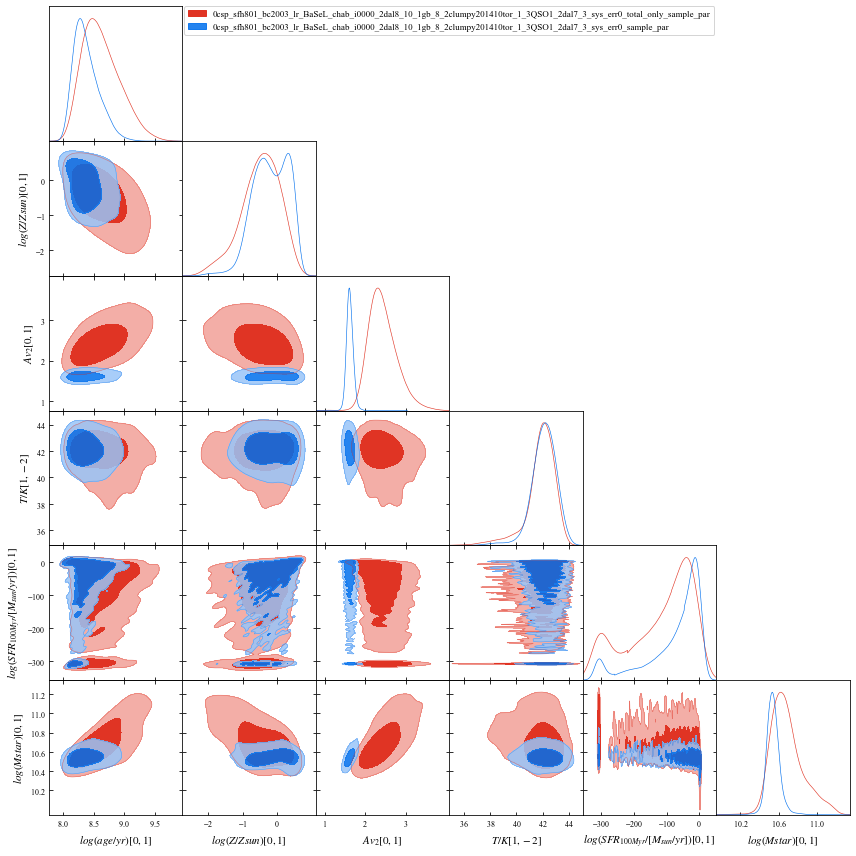

time: 10.8 s (started: 2024-11-27 11:04:36 +08:00)


In [10]:
%matplotlib inline
from getdist import plots
import os

g=plots.get_subplot_plotter(chain_dir=os.getcwd()+r'/observation/agn_host_decomp/output/sample/cid_71')
roots = ['0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_total_only_sample_par', '0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0_sample_par']
params = ['log(age/yr)[0,1]', 'log(Z/Zsun)[0,1]', 'Av_2[0,1]', 'T/K[1,-2]', 'log(SFR_{100Myr}/[M_{sun}/yr])[0,1]', 'log(Mstar)[0,1]']
g.triangle_plot(roots, params, filled=True)
g.export()

## Read in parameter estimation from *.hdf5 file

In [11]:
from astropy.table import Table, join, hstack, vstack
h=h5py.File("./observation/agn_host_decomp/output/sample_0csp_sfh801_bc2003_lr_BaSeL_chab_i0000_2dal8_10_1gb_8_2clumpy201410tor_1_3QSO1_2dal7_3_sys_err0.hdf5", 'r')
COLNAMES = [x.decode('utf-8') for x in h['parameters_name'][:]]
ID=Table([h['ID'][:]],names=['ID'])
parameters=Table(h['parameters'][:],names=COLNAMES,copy=False);mask=parameters['SNR']>0;len(parameters[mask])
parameters=hstack([ID,parameters])
parameters

ID,z_min,z_max,d,E(B-V),F435W_host,F435W_err_host,F606W_host,F606W_err_host,F775W_host,F775W_err_host,F814W_host,F814W_err_host,F850LP_host,F850LP_err_host,F105W_host,F105W_err_host,F110W_host,F110W_err_host,F125W_host,F125W_err_host,F140W_host,F140W_err_host,F160W_host,F160W_err_host,F435W_point,F435W_err_point,F606W_point,F606W_err_point,F775W_point,F775W_err_point,F814W_point,F814W_err_point,F850LP_point,F850LP_err_point,F105W_point,F105W_err_point,F110W_point,F110W_err_point,F125W_point,F125W_err_point,F140W_point,F140W_err_point,F160W_point,F160W_err_point,GALEX.FUV_total,GALEX.FUV_err_total,GALEX.NUV_total,GALEX.NUV_err_total,SLOAN.SDSS.u_total,SLOAN.SDSS.u_err_total,SLOAN.SDSS.g_total,SLOAN.SDSS.g_err_total,SLOAN.SDSS.r_total,SLOAN.SDSS.r_err_total,SLOAN.SDSS.i_total,SLOAN.SDSS.i_err_total,SLOAN.SDSS.z_total,SLOAN.SDSS.z_err_total,PS1.g_total,PS1.g_err_total,PS1.r_total,PS1.r_err_total,PS1.i_total,PS1.i_err_total,PS1.z_total,PS1.z_err_total,PS1.y_total,PS1.y_err_total,WFPC2-PC.F300W_total,WFPC2-PC.F300W_err_total,WFPC2-PC.F450W_total,WFPC2-PC.F450W_err_total,ACS_WFC.F435W_total,ACS_WFC.F435W_err_total,ACS_WFC.F606W_total,ACS_WFC.F606W_err_total,ACS_WFC.F775W_total,ACS_WFC.F775W_err_total,ACS_WFC.F814W_total,ACS_WFC.F814W_err_total,ACS_WFC.F850LP_total,ACS_WFC.F850LP_err_total,WFC3_UVIS1.F225W_total,WFC3_UVIS1.F225W_err_total,WFC3_UVIS1.F275W_total,WFC3_UVIS1.F275W_err_total,WFC3_UVIS1.F336W_total,WFC3_UVIS1.F336W_err_total,WFC3_IR.F098M_total,WFC3_IR.F098M_err_total,WFC3_IR.F105W_total,WFC3_IR.F105W_err_total,WFC3_IR.F110W_total,WFC3_IR.F110W_err_total,WFC3_IR.F125W_total,WFC3_IR.F125W_err_total,WFC3_IR.F140W_total,WFC3_IR.F140W_err_total,WFC3_IR.F160W_total,WFC3_IR.F160W_err_total,VISTA.Y_total,VISTA.Y_err_total,VISTA.J_total,VISTA.J_err_total,VISTA.H_total,VISTA.H_err_total,VISTA.Ks_total,VISTA.Ks_err_total,UFTI.Y_total,UFTI.Y_err_total,UFTI.J_total,UFTI.J_err_total,UFTI.H_total,UFTI.H_err_total,UFTI.K_total,UFTI.K_err_total,WISE.W1_total,WISE.W1_err_total,WISE.W2_total,WISE.W2_err_total,WISE.W3_total,WISE.W3_err_total,WISE.W4_total,WISE.W4_err_total,IRAC.I1_total,IRAC.I1_err_total,IRAC.I2_total,IRAC.I2_err_total,IRAC.I3_total,IRAC.I3_err_total,IRAC.I4_total,IRAC.I4_err_total,MIPS.24mu_total,MIPS.24mu_err_total,Pacs.red_total,Pacs.red_err_total,Pacs.blue_total,Pacs.blue_err_total,Pacs.green_total,Pacs.green_err_total,SPIRE.PSW_total,SPIRE.PSW_err_total,SPIRE.PMW_total,SPIRE.PMW_err_total,SPIRE.PLW_total,SPIRE.PLW_err_total,"lambda0(um)[1,-2]","lambda1(um)[1,-2]","kappa1(cm^2/g)[1,-2]",sys_err1,z_{mean},z_{sigma},z_{MAL},z_{MAP},z_{median},z_{0.16},z_{0.84},z_{0.025},z_{0.975},sys_err0_{mean},sys_err0_{sigma},sys_err0_{MAL},sys_err0_{MAP},sys_err0_{median},sys_err0_{0.16},sys_err0_{0.84},sys_err0_{0.025},sys_err0_{0.975},"log(age/yr)[0,1]_{mean}","log(age/yr)[0,1]_{sigma}","log(age/yr)[0,1]_{MAL}","log(age/yr)[0,1]_{MAP}","log(age/yr)[0,1]_{median}","log(age/yr)[0,1]_{0.16}","log(age/yr)[0,1]_{0.84}","log(age/yr)[0,1]_{0.025}","log(age/yr)[0,1]_{0.975}","alpha[0,1]_{mean}","alpha[0,1]_{sigma}","alpha[0,1]_{MAL}","alpha[0,1]_{MAP}","alpha[0,1]_{median}","alpha[0,1]_{0.16}","alpha[0,1]_{0.84}","alpha[0,1]_{0.025}","alpha[0,1]_{0.975}","beta[0,1]_{mean}","beta[0,1]_{sigma}","beta[0,1]_{MAL}","beta[0,1]_{MAP}","beta[0,1]_{median}","beta[0,1]_{0.16}","beta[0,1]_{0.84}","beta[0,1]_{0.025}","beta[0,1]_{0.975}","tau[0,1]_{mean}","tau[0,1]_{sigma}","tau[0,1]_{MAL}","tau[0,1]_{MAP}","tau[0,1]_{median}","tau[0,1]_{0.16}","tau[0,1]_{0.84}","tau[0,1]_{0.025}","tau[0,1]_{0.975}","p[0,1]_{mean}","p[0,1]_{sigma}","p[0,1]_{MAL}","p[0,1]_{MAP}","p[0,1]_{median}","p[0,1]_{0.16}","p[0,1]_{0.84}","p[0,1]_{0.025}","p[0,1]_{0.975}","log(Z/Zsun)[0,1]_{mean}","log(Z/Zsun)[0,1]_{sigma}","log(Z/Zsun)[0,1]_{MAL}","log(Z/Zsun)[0,1]_{MAP}","log(Z/Zsun)[0,1]_{median}","log(Z/Zsun)[0,1]_{0.16}","log(Z/Zsun)[0,1]_{0.84}","log(Z/Zsun)[0,1]_{0.025}","log(Z/Zsun)[0,1]_{0.975}","f[0,1]_{mean}","f[0,1]_{sigma}","f[0,1]_{MAL}","f[0,1]_{MAP}","f[0,1]_{median

time: 120 ms (started: 2024-11-27 11:04:47 +08:00)
